<a href="https://colab.research.google.com/github/mertcantombak/gym-rs/blob/main/GYM_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>  **Mertcan TOMBAK -
170419036** \\
>  **Batıkan Çağrı SAVCI -
170419014** \\
>  **Cafer Can ÇÖTEL - 
170419021** \\

1.   Bu çalışma Yapay Zekaya Giriş dersi kapsamında yapılmıştır.
2.   Random Forest algoritması kullanılarak ilgili modelin eğitilmesi gerçekleştirilmiştir.
3.   Çalışmada Kagge üzerinden elde edilen Gym Exercise Dataset kullanılmıştır.
4.   Aşağıdaki kod blokları arasındaki açıklamalardan faydalanılarak çalışma yürütülebilir ve sonuçlar elde edilebilir.

In [ ]:
# Çalışmada kullanılacak fonksiyonel kütüphaneler dahil ediliyor.
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Çalışmada kullanılacak makine öğrenmesi kütüphaneleri dahil ediliyor.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Feature name içeriklerinin belirli noktalarda yoksayılması ile ilgili uyarıların kaldırılması için kullanılmıştır.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# GYM Programs veri kümesi pandas aracılığı ile okunuyor.
program_dataset = pd.read_csv('datasets/gym-programs.csv')
program_data = program_dataset.iloc[:,2:]
program_target = program_dataset['class']

In [ ]:
# Program veri kümesinine ait bilgiler ve incelenmesi.
program_dataset.dtypes

index     int64
class     int64
level     int64
eq        int64
gender    int64
goal      int64
bmi       int64
time      int64
dtype: object

In [ ]:
print("Row count:\t" + str(program_dataset.shape[0]))
print("Col count:\t" + str(program_dataset.shape[1]))

Row count:	140
Col count:	8


In [ ]:
program_counts = program_dataset.groupby(['class']).count()
program_counts


,index,level,eq,gender,goal,bmi,time
class,,,,,,,
1,20,20,20,20,20,20,20
2,20,20,20,20,20,20,20
3,20,20,20,20,20,20,20
4,20,20,20,20,20,20,20
5,20,20,20,20,20,20,20
6,19,19,19,19,19,19,19
7,21,21,21,21,21,21,21


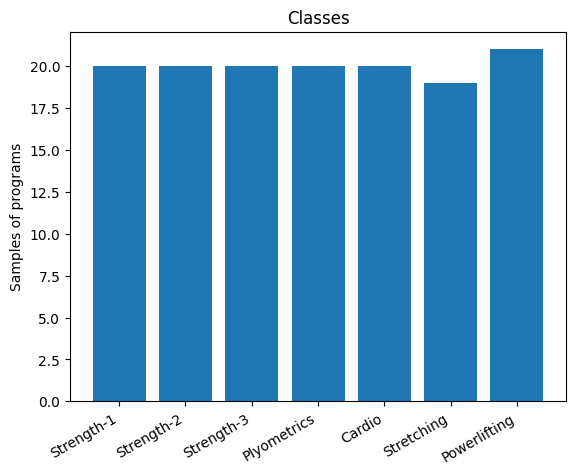

In [ ]:
fig1, ax1 = plt.subplots()
goals_counts= program_dataset.groupby(['class'])['class'].count()
classes = ["Strength-1", "Strength-2", "Strength-3", "Plyometrics", "Cardio", "Stretching", "Powerlifting"]
ax1.bar(classes, program_counts['index'])

ax1.set_ylabel('Samples of programs')
ax1.set_title('Classes')
plt.xticks(rotation=30, ha='right')

plt.show()

In [ ]:
# Data ve target içeriklerinin belirlenen oran ve random_state doğrultusunda train-test olarak ayrılması.
x_train, x_test, y_train, y_test = train_test_split(program_data, program_target, test_size=0.20, random_state=90)
len(x_train), len(x_test)

(112, 28)

In [ ]:
# Random Forest Classifier ile modelin oluşturulması ve verinin modele fit edilmesi.
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Cross-validation işlemi uygulanarak (7 fold) modelin test edilmesi.
# Not: Bu aşamada veri train/test olarak ayrılmadan verilmiştir, cv=7 ile veri 7 parçaya bölünerek cv işlemi gerçekleştirilmektedir.
scores = cross_val_score(model, program_data, program_target, cv=7)
print("Scores for cross-validation: ", scores)

Scores for cross-validation:  [0.95 0.85 0.8  1.   1.   0.95 0.75]


In [ ]:
# Skorlara ait ortalama hesaplanıyor.
print("Mean: ", scores.mean())

# Skorlara ait standart sapma hesaplanıyor.
print("Std: ", scores.std())

Mean:  0.9
Std:  0.09258200997725513


In [ ]:
# CV işlemine ek olarak başlangıçta oluşturulan train-test verileri ile model test ediliyor.
# Test sonuçları ve gerçek sonuçlar ile oluşturulan confusion_matrix ve hesaplanan accuracy ve f1 score değerleri görüntüleniyor.
predicted = model.predict(x_test)
acc = accuracy_score(y_test, predicted)
print("Accuracy: " + str(acc))
f1 = f1_score(y_test, predicted, average="weighted")
print("F1 Score: " + str(f1))
cm = confusion_matrix(y_test, predicted)
print("Confusion Matrix: \n", cm)

Accuracy: 0.8214285714285714
F1 Score: 0.8069727891156463
Confusion Matrix: 
 [[1 0 0 0 0 0 0]
 [2 1 2 0 0 0 0]
 [0 1 3 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 8]]


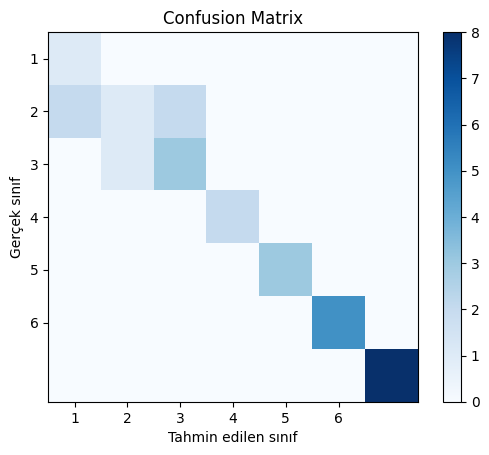

In [ ]:
# Confusion matrix içeriği sınıflar ile birlikte 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(6)
plt.xticks(tick_marks, [1,2,3,4,5,6])
plt.yticks(tick_marks, [1,2,3,4,5,6])
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

In [ ]:
# Bu kısım ilgili verisetine ait zero-rule oranını bulmak için kullanılmıştır. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(program_data, program_target)
dummy_clf.score(program_data, program_target)

0.15

In [ ]:
# Test edilen örneklerde oluşturulan dizi yapısı, modelin eğitilmiş olduğu veri kümesindeki kolon sıraları ile eşdeğer biçimde tanımlanmıştır.
# Bu doğrultuda 6 boyutlu bir dizi için değerler sırasıyla şu özellikleri temsil etmektedir:
#   level: Antrenmanın zorluk derecesi veya kullanıcının spor tecrübesi olarak belirtilir. [1: Beginner, 2: Intermediate, 3: Expert]
#   eq: Antrenmanın gerçekleştirileceği ekipman veya ortamı belirtir. [1: No-eqs, 2: Basic eqs, 3: Advanced eqs. ]
#   gender: Kullanıcının cinsiyetini belirtir. [1: Male, 2: Female]
#   goal: Kullanıcının spor hedefini belirtir. [1: Strength, 2: Plyometrics, 3: Cardio, 4: Stretching, 5: Powerlifting]
#   bmi: Kullanıcıya ait vücut kitle indeksini belirtir. [1: <19, 2: <25, 3: <30, 4: >30]
#   time: Kullanıcının gün içerisinde spora ayırmak istediği süre miktarını dakika cinsinden belirtir. [1: <45min, 2: <90, 3: >90]

feature_test1 = np.array([2,3,1,1,3,3])
feature_test1 = feature_test1.reshape(1,-1)

# Tanımlanan bu örnek için
#   orta seviyeli, gelişmiş ekipmanlar kullanarak, güç kazanımına yönelik, yaklaşık 175 boylarında ve 80 kilogram bir erkeğin günde 90 dakikadan fazla
#   ayıracağı bir senaryo için antrenman programının sınıfı belirlenmektedir.

prediction_test1 = model.predict(feature_test1)
print("Bu senaryo için tahmin edilen sınıf:", prediction_test1[0]) 

Bu senaryo için tahmin edilen sınıf: 3


In [ ]:
# Tahmin edilen sınıf doğrultusunda filtreleme işlemi ile elde edilecek egzersizlerin yer aldığı veri kümesi tanımlanıyor.
gym_dataset = pd.read_csv('datasets/megaGymDataset.csv')
gym_dataset.columns = gym_dataset.columns.str.replace('Unnamed: 0', 'index')
gym_dataset

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [ ]:
# Kaggle üzerinden alınan veri kümesindeki eksik değerlerin yer aldığı satırlar tespit ediliyor.
missing_values_count = gym_dataset.isnull().sum()
missing_values_count

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [ ]:
# Veri kümesine ait içerik ve incelenmesi.
gym_dataset.dtypes

index           int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

In [ ]:
print("Row count:\t" + str(gym_dataset.shape[0]))
print("Col count:\t" + str(gym_dataset.shape[1]))

Row count:	2918
Col count:	9


In [ ]:
# Kaslara ve bölgelere göre verinin gruplandırılması ve incelenmesi
count_exercises = gym_dataset.groupby(['BodyPart']).count()
count_exercises

,index,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,,
Abdominals,662,662,298,662,662,662,112,94
Abductors,21,21,8,21,21,21,10,9
Adductors,17,17,7,17,17,17,13,10
Biceps,168,168,101,168,168,168,55,53
Calves,47,47,26,47,47,47,26,26
Chest,262,262,149,262,262,262,113,90
Forearms,31,31,16,31,31,31,24,23
Glutes,81,81,29,81,81,81,25,22
Hamstrings,121,121,50,121,121,121,85,71


In [ ]:
# İçeriğin görselleştirilmesi.
count_exercises= count_exercises.sort_values(by='index', ascending= False)
fig = px.bar(count_exercises, x=count_exercises.index, y='index')
fig.show()

In [ ]:
# Bu aşamadan sonra diğer veri kümesini anlamak ve incelemek amacı ile çalışmalar gerçekleştirilmektedir.
# 'Intermediate' zorluk düzeyinde olan egzersizlerin listelenmesi.
intermediate_exercises = gym_dataset[gym_dataset.Level == 'Intermediate']
intermediate_exercises

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2912,2912,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [ ]:
# İlgili zorluk seviyesindeki egzersizlerden ekipman gerektirmeyenlerin listelenmesi.
body_only_intermediate_exercises = intermediate_exercises[intermediate_exercises.Equipment == 'Body Only']
body_only_intermediate_exercises

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
185,185,Elbow plank,The elbow plank is a popular isometric abdomin...,Strength,Abdominals,Body Only,Intermediate,9.3,Average
186,186,Bottoms Up,The lying leg lift is a popular bodyweight exe...,Strength,Abdominals,Body Only,Intermediate,9.3,Average
187,187,Spider crawl,The spider crawl is a bodyweight exercise that...,Strength,Abdominals,Body Only,Intermediate,9.2,Average
188,188,Cocoons,The cocoon crunch is a bodyweight exercise tar...,Strength,Abdominals,Body Only,Intermediate,9.1,Average
189,189,Cross-Body Crunch,The elbow-to-knee crunch is a bodyweight exerc...,Strength,Abdominals,Body Only,Intermediate,9.1,Average
...,...,...,...,...,...,...,...,...,...
2905,2905,Holman Couch Triceps Dip,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2906,2906,FYR2 Triceps Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2907,2907,30 Arms Triceps Dip,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2908,2908,30 Arms Close-Grip Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN


In [ ]:
# İlgili egzersizlerin çalıştırmış olduğu kas grubu veya vücut bölümlerine göre dağılımlarının incelenmesi ve görselleştirilmesi.
body_only_exercises_groupby_bodypart = body_only_intermediate_exercises.groupby(['BodyPart']).count()
body_only_exercises_groupby_bodypart = body_only_exercises_groupby_bodypart.sort_values(by='index')
fig = px.bar(body_only_exercises_groupby_bodypart, x=body_only_exercises_groupby_bodypart.index, y='index', color ='index')
fig.show()

In [ ]:
# Egzersizlerin vücut bölgesi ve amaçları doğrultusunda gruplandırılması.
bodyPart_dist = gym_dataset.groupby(['Type','BodyPart']).count()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

In [ ]:
# İlgili içeriklerin 0 ve 1 seviyelerine göre gruplandırılarak toplam egzersiz sayısının elde edilmesi
bodyPart_dist=bodyPart_dist.groupby(level=[0,1]).sum()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

In [ ]:
# Kaç farklı eşsiz egzersiz tipi olduğu bilgisi elde ediliyor.
allTypes =(gym_dataset["Type"].unique())
len(allTypes)

7

In [ ]:
# Her egzersiz tipi için elde edilen egzersiz sayıları tanımlanıyor.
typeDfs = []
for i in range(7):
    typeDfs.append(bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == allTypes[i]])

In [ ]:
# İlgili veriler görselleştirilerek etkileşimli grafik yapısı oluşturuluyor.
# Not: Bu aşamada, oluşturulan gym-programs veri kümesine uygun sınıflara ait egzersizlerin yer aldığı veri kümelerinin grafikleri çizilmektedir.
fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
          ])

fig.add_trace(go.Pie(values=typeDfs[0]['index'].values, title=allTypes[0], labels=typeDfs[0].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)
    
fig.add_trace(go.Pie(values=typeDfs[1]['index'].values, title=allTypes[1], labels=typeDfs[1].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)
fig.add_trace(go.Pie(values=typeDfs[2]['index'].values, title=allTypes[2], labels=typeDfs[2].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)
fig.add_trace(go.Pie(values=typeDfs[3]['index'].values, title=allTypes[3],labels=typeDfs[3].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)
fig.add_trace(go.Pie(values=typeDfs[4]['index'].values, title=allTypes[4], labels=typeDfs[4].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=1)
fig.update_layout(height=900, showlegend=False)
fig.update_layout(height=1200, showlegend=False)